In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, Flatten, MaxPool2D, BatchNormalization, GlobalAveragePooling2D, Dense, Dropout, Add, AvgPool2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input, Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import InputLayer

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
X_train=X_train/255
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)

In [4]:
y_train.shape

(60000,)

In [5]:
print(X_train[0].shape)

(28, 28, 1)


In [6]:
def build_MiniResnet(input_shape, classes):
    input = Input(shape=input_shape)
    C1 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (input)
    P1 = MaxPool2D(strides=2) (C1)

    C2 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (P1)
    C3 = Conv2D(kernel_size=(3,3), filters=8, activation='relu', padding='same') (C2)

    add1 = Add () ([P1, C3])
    C4 = Conv2D(kernel_size=(3,3), filters=16, strides=(2, 2), activation='relu', padding='same') (add1)
    C5 = Conv2D(kernel_size=(3,3), filters=16, activation='relu', padding='same') (C4)
    C6 = Conv2D(kernel_size=(3,3), filters=16, activation='relu', padding='same') (C5)
    
    add2 = Add()([C4, C6])
    P2 = AvgPool2D()(add2)
    F1 = Flatten()(P2)

    D1 = Dense (400, activation='relu')(F1)
    output = Dense(classes, activation='softmax') (D1)
    model = Model(input, output)
    return model

In [7]:
model = build_MiniResnet(X_train[0].shape, 10)

In [8]:
model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=Adam(lr=1e-4),
        metrics=['accuracy']
    )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 28, 28, 8)    80          ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 14, 14, 8)    0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 14, 14, 8)    584         ['max_pooling2d[0][0]']          
                                                                                              

In [10]:
stop_patience = 5
callbacks = [
    #ModelCheckpoint("miniresnet.h5", save_best_only=True, verbose = 0),
    EarlyStopping(patience=stop_patience, monitor='val_loss', verbose=1,restore_best_weights=True),
    #ReduceLROnPlateau(monitor='val_loss', factor=factor, patience=patience, min_lr=1e-6, verbose=1)
]

# Train model và lưu model và visualize kết quả huấn luyện

In [11]:
batch_size=32
epochs=100
history = model.fit(X_train, 
          y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=callbacks,
          verbose=1)

Epoch 1/100
1500/1500 [==============================] - 41s 27ms/step - loss: 0.7202 - accuracy: 0.7852 - val_loss: 0.2763 - val_accuracy: 0.9186
Epoch 2/100
1500/1500 [==============================] - 42s 28ms/step - loss: 0.2368 - accuracy: 0.9292 - val_loss: 0.1699 - val_accuracy: 0.9495
Epoch 3/100
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1626 - accuracy: 0.9495 - val_loss: 0.1316 - val_accuracy: 0.9616
Epoch 4/100
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1277 - accuracy: 0.9604 - val_loss: 0.1159 - val_accuracy: 0.9654
Epoch 5/100
1500/1500 [==============================] - 45s 30ms/step - loss: 0.1071 - accuracy: 0.9666 - val_loss: 0.0997 - val_accuracy: 0.9709
Epoch 6/100
1500/1500 [==============================] - 47s 31ms/step - loss: 0.0926 - accuracy: 0.9713 - val_loss: 0.0853 - val_accuracy: 0.9747
Epoch 7/100
1500/1500 [==============================] - 47s 32ms/step - loss: 0.0829 - accuracy: 0.9744 - val_loss: 0

In [12]:
model.save('miniResNet.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


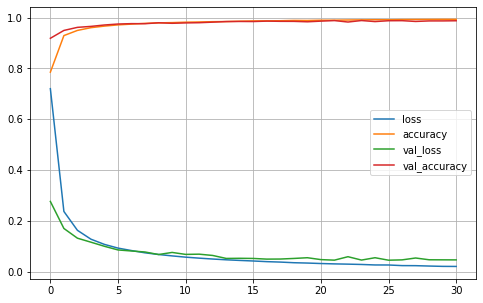

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

# Evaluate trên tập test và visualize một số ảnh trong tập test

In [14]:
X_test = X_test/255


In [15]:
loss_test,accuracy_test=model.evaluate(X_test, y_test)
print("Độ chính xác trên tập test: ",accuracy_test)
print("Độ lỗi trên tập test: ",loss_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.0404 - accuracy: 0.9874
Độ chính xác trên tập test:  0.9873999953269958
Độ lỗi trên tập test:  0.04035245254635811


In [16]:
prediction = model.predict(X_test)
y_pred = [np.argmax(prediction[i]) for i in range(len(X_test))]
pred=prediction

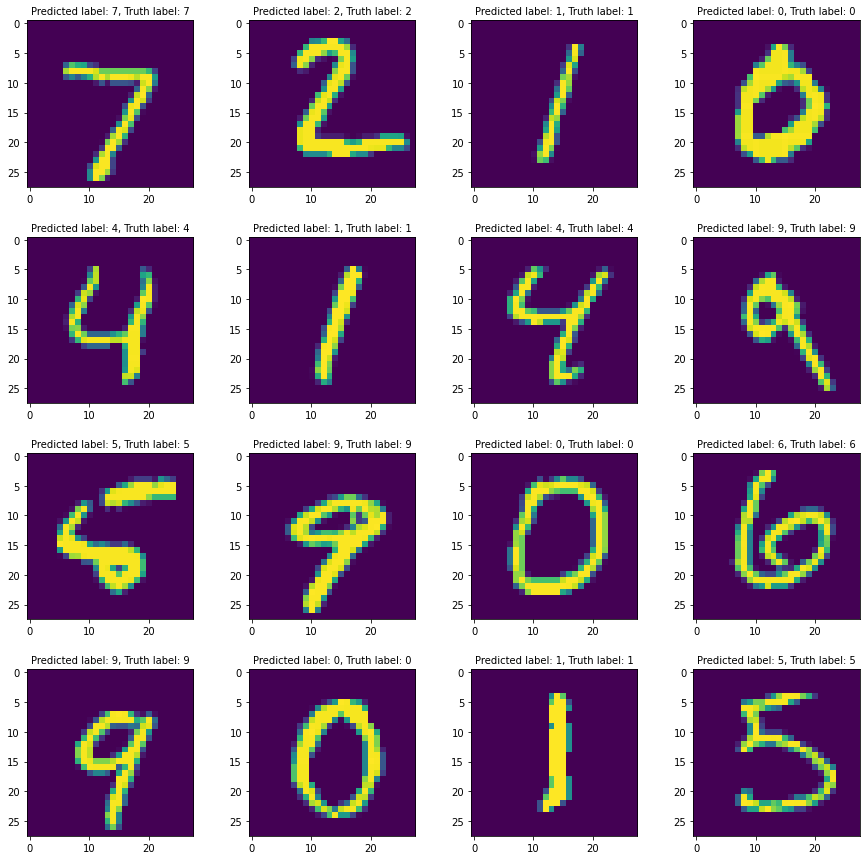

In [17]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    label_pred = "Predicted label: " + str(np.argmax(pred[i])) + ", Truth label: " + str(y_test[i])
    plt.title(label_pred, fontsize=10)
    plt.imshow(X_test[i])

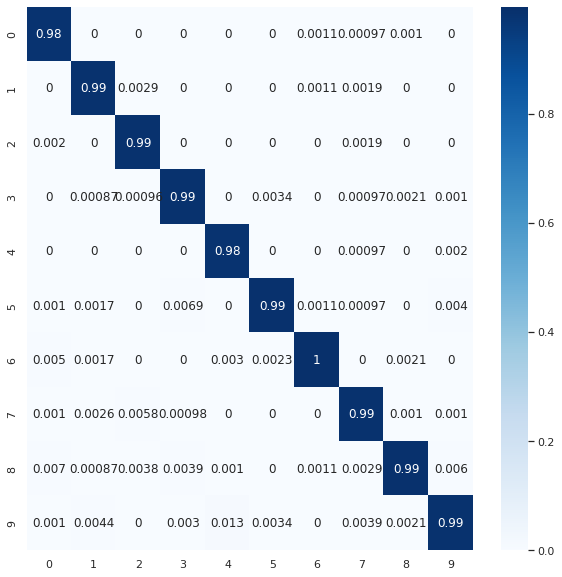

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
labels = [_ for _ in range(10)]
confusion_matrix = confusion_matrix(y_test, y_pred, normalize='pred')
sns.set(rc={'figure.figsize':(10,10)})
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')